#### Notes
F1 scoring chosen for hyperparameter tuning in order to minimize false positives as well as false negatives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import scipy.sparse
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import pickle

### Random Forest hyperparameters

In [2]:
rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':np.linspace(0,50),
    'min_samples_leaf':np.linspace(1,10),
    'n_estimators':np.linspace(1,100),
    'class_weight': ['balanced'],
    'max_features':[None,1,2,3,4,5,6,7,8,9,10],
    'min_impurity_decrease':np.linspace(0,0.25,6),
    'random_state': [42],
    'n_jobs':[-1],
    'verbose':[2]
}

### Import data

In [3]:
print('Importing data...')
data_path = r'../data/clean_df.csv.gz'
df = pd.read_csv(data_path)
print('Done.')

print('Engineering features...')
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

df['CASUALTIES?'] = 0
mask = df['TOTAL PEDESTRIAN CASUALTIES'] != 0
df.loc[mask, 'CASUALTIES?'] = 1
df.loc[df['TOTAL PEDESTRIAN CASUALTIES'] != 1, ['TOTAL PEDESTRIAN CASUALTIES','CASUALTIES?']].sample(5)
print('Done.')

Importing data...
Done.
Engineering features...
Done.


### K-Means analysis

Manhattan K-Means analysis
# Clusters: 2
    F1 score: 0.15514768303035625
# Clusters: 3
    F1 score: 0.16375080537245382
# Clusters: 4
    F1 score: 0.16263494412506876
# Clusters: 5
    F1 score: 0.15906227501799858
# Clusters: 6
    F1 score: 0.1631321370309951
# Clusters: 7
    F1 score: 0.16446242122095758
# Clusters: 8
    F1 score: 0.16589526013542472
# Clusters: 9
    F1 score: 0.15604794769342537
# Clusters: 10
    F1 score: 0.16557035135568748
# Clusters: 11
    F1 score: 0.16600680420985614
# Clusters: 12
    F1 score: 0.16823475563240603
# Clusters: 13
    F1 score: 0.16943620860051942
# Clusters: 14
    F1 score: 0.16868100494861057
# Clusters: 15
    F1 score: 0.16798516012875772
# Clusters: 16
    F1 score: 0.16812755655730863
# Clusters: 17
    F1 score: 0.16539821417870199
# Clusters: 18
    F1 score: 0.16822799097065463
# Clusters: 19
    F1 score: 0.16918726177302348
# Clusters: 20
    F1 score: 0.17124326897331393
# Clusters: 21
    F1 score: 0.1685299684542587
# C

# Clusters: 71
    F1 score: 0.18477312967416293
# Clusters: 72
    F1 score: 0.1865249169435216
# Clusters: 73
    F1 score: 0.18482062962661677
# Clusters: 74
    F1 score: 0.1856848032582995
# Clusters: 75
    F1 score: 0.18378260692076367
# Clusters: 76
    F1 score: 0.18644802516689168
# Clusters: 77
    F1 score: 0.18633036167282746
# Clusters: 78
    F1 score: 0.18611800237299106
# Clusters: 79
    F1 score: 0.18490406050410974
# Clusters: 80
    F1 score: 0.1841257263602747
# Clusters: 81
    F1 score: 0.1865952024381913
# Clusters: 82
    F1 score: 0.1856640755278483
# Clusters: 83
    F1 score: 0.1869608220231881
# Clusters: 84
    F1 score: 0.18651511925042588
# Clusters: 85
    F1 score: 0.1868458800403761
# Clusters: 86
    F1 score: 0.18678888754874762
# Clusters: 87
    F1 score: 0.18553784972134316
# Clusters: 88
    F1 score: 0.1858891571677242
# Clusters: 89
    F1 score: 0.18762266459358193
# Clusters: 90
    F1 score: 0.187561672625684
# Clusters: 91
    F1 score: 0

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.09162370044797566
# Clusters: 3
    F1 score: 0.08894518330870453
# Clusters: 4
    F1 score: 0.08689748811948404
# Clusters: 5
    F1 score: 0.09028284301807277
# Clusters: 6
    F1 score: 0.09581824168587422
# Clusters: 7
    F1 score: 0.0941215876737565
# Clusters: 8
    F1 score: 0.09435862995298859
# Clusters: 9
    F1 score: 0.09453668987680772
# Clusters: 10
    F1 score: 0.10533274570295285
# Clusters: 11
    F1 score: 0.10389170896785109
# Clusters: 12
    F1 score: 0.10394374808926934
# Clusters: 13
    F1 score: 0.10393557210150432
# Clusters: 14
    F1 score: 0.10022975301550834
# Clusters: 15
    F1 score: 0.10215226469643429
# Clusters: 16
    F1 score: 0.10136136945680009
# Clusters: 17
    F1 score: 0.09986504723346828
# Clusters: 18
    F1 score: 0.10125406409660938
# Clusters: 19
    F1 score: 0.09985422740524781
# Clusters: 20
    F1 score: 0.10271343481138318
# Clusters: 21
    F1 score: 0.10310543758438691
# Clusters: 22
    F1 score: 

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.12825868584275396
# Clusters: 3
    F1 score: 0.12862595419847328
# Clusters: 4
    F1 score: 0.12194879513795209
# Clusters: 5
    F1 score: 0.12672211695943994
# Clusters: 6
    F1 score: 0.1286882332029861
# Clusters: 7
    F1 score: 0.13083722955195062
# Clusters: 8
    F1 score: 0.13201927113527775
# Clusters: 9
    F1 score: 0.13063946645743427
# Clusters: 10
    F1 score: 0.128740540710271
# Clusters: 11
    F1 score: 0.132666194735826
# Clusters: 12
    F1 score: 0.13027570887233764
# Clusters: 13
    F1 score: 0.12779749580991817
# Clusters: 14
    F1 score: 0.12800039736250637
# Clusters: 15
    F1 score: 0.1310718334103027
# Clusters: 16
    F1 score: 0.1328343720544168
# Clusters: 17
    F1 score: 0.1312832977686079
# Clusters: 18
    F1 score: 0.1376287153392584
# Clusters: 19
    F1 score: 0.1353637901861252
# Clusters: 20
    F1 score: 0.1381406271584473
# Clusters: 21
    F1 score: 0.13862984218077476
# Clusters: 22
    F1 score: 0.13531199

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.14875006469644425
# Clusters: 3
    F1 score: 0.1415281076801267
# Clusters: 4
    F1 score: 0.14751635817399497
# Clusters: 5
    F1 score: 0.1515106147258736
# Clusters: 6
    F1 score: 0.14724411673305646
# Clusters: 7
    F1 score: 0.1492707863479176
# Clusters: 8
    F1 score: 0.1478784200677692
# Clusters: 9
    F1 score: 0.1511225144323284
# Clusters: 10
    F1 score: 0.15478299379982288
# Clusters: 11
    F1 score: 0.14992237746728765
# Clusters: 12
    F1 score: 0.14979177925422002
# Clusters: 13
    F1 score: 0.15026966710061374
# Clusters: 14
    F1 score: 0.15066859187645176
# Clusters: 15
    F1 score: 0.15211572584283178
# Clusters: 16
    F1 score: 0.15165215280517036
# Clusters: 17
    F1 score: 0.15695421025553077
# Clusters: 18
    F1 score: 0.15111712931618143
# Clusters: 19
    F1 score: 0.15727626727316585
# Clusters: 20
    F1 score: 0.15804984537020195
# Clusters: 21
    F1 score: 0.1551069868299372
# Clusters: 22
    F1 score: 0.158

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


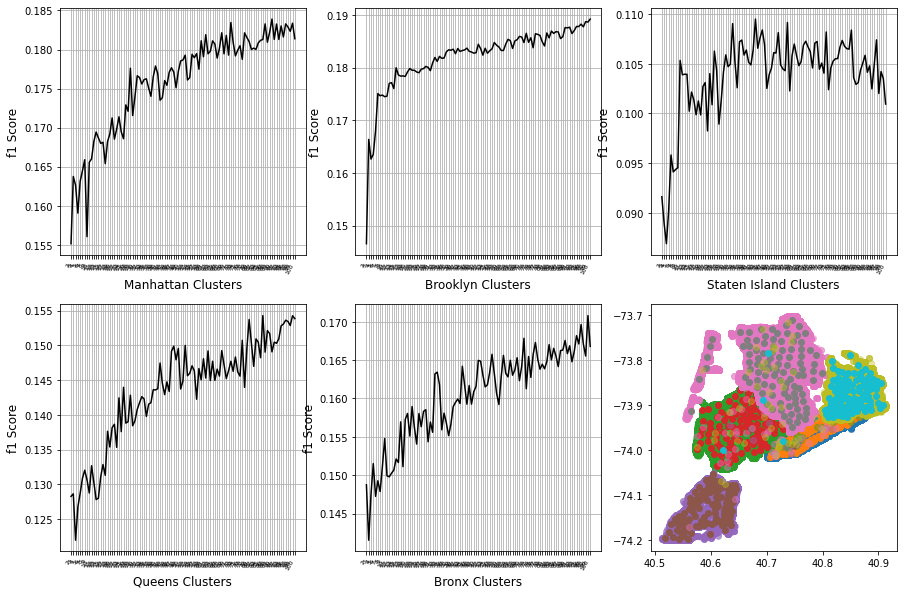

In [4]:
boroughs = ['MANHATTAN','BROOKLYN','STATEN ISLAND','QUEENS','BRONX']
subplots = [231,232,233,234,235]
k_range = range(2,101)

_ = plt.figure(figsize=(15,10))
max_k = {}
for space, current_borough in zip(subplots, boroughs):
    print(f'{current_borough.title()} K-Means analysis')
    borough = df[df['BOROUGH'] == current_borough]
    f1_list = []
    for i in k_range:
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(borough[['LATITUDE','LONGITUDE']].values)
        df_clusters = pd.Series(kmeans.labels_)
        cluster_dummies = pd.get_dummies(df_clusters)
        X = scipy.sparse.csr_matrix(cluster_dummies)
        y = borough['CASUALTIES?']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        log_reg = LogisticRegression(class_weight='balanced', max_iter=10_000)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        log_f1 = f1_score(y_test, y_pred)
        print(f'# Clusters: {i}\n    F1 score: {log_f1}')
        f1_list.append(log_f1)
    _ = plt.subplot(space)
    _ = plt.plot(k_range, f1_list, 'k-')
    _ = plt.grid()
    _ = plt.xlabel(f'{current_borough.title()} Clusters', fontsize=12)
    _ = plt.ylabel('f1 Score', fontsize=12)
    _ = plt.xticks(k_range, rotation=60, ha='right', fontsize=6)
    max_k[current_borough] = {
                        'K':f1_list.index(max(f1_list))+2,
                        'Score': max(f1_list)
            }
    _ = plt.subplot(236)
    _ = plt.scatter(borough['LATITUDE'], borough['LONGITUDE'], alpha=0.4)
    _ = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
_ = plt.savefig('K-Means borough analysis.png')

In [5]:
for i in max_k:
    print(f'{i}\n    {max_k[i]}')

MANHATTAN
    {'K': 90, 'Score': 0.18389373183893734}
BROOKLYN
    {'K': 100, 'Score': 0.18923548862595116}
STATEN ISLAND
    {'K': 43, 'Score': 0.10949227373068433}
QUEENS
    {'K': 86, 'Score': 0.15427110676480177}
BRONX
    {'K': 99, 'Score': 0.17080344332855094}


### Fit clusters

In [6]:
print('Fitting K-means clusters...')
k_clusters = []
for i in max_k:
    k_clusters.append(max_k[i]['K'])
for n, borough in zip(k_clusters,boroughs):
    print(f'    Calculating {borough.title()} clusters...')
    
    borough_accidents = df[df['BOROUGH'] == borough]
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(borough_accidents[['LATITUDE','LONGITUDE']].values)
    
    df.loc[df['BOROUGH'] == borough, f'{borough} CLUSTERS'] = kmeans.labels_
print('Done.')

Fitting K-means clusters...
    Calculating Manhattan clusters...
    Calculating Brooklyn clusters...
    Calculating Staten Island clusters...
    Calculating Queens clusters...
    Calculating Bronx clusters...
Done.


### Create feature set

In [7]:
print('Creating feature set...')
borough_dummies = pd.get_dummies(df['BOROUGH'], sparse=True)
borough_clusters = [borough+' CLUSTERS' for borough in boroughs]
cluster_dummies = pd.get_dummies(df[borough_clusters].fillna(''), prefix='CLUSTER', sparse=True)
pre_X = cluster_dummies.join(borough_dummies)
print('Done.')

Creating feature set...
Done.


### TF-IDF analysis

In [8]:
# TFIDF hyperparameter tuning; comparison to count vectorization

### Split data

In [9]:
print('Splitting data...')
X = scipy.sparse.csr_matrix(pre_X)
y = df['CASUALTIES?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Done.')

Splitting data...
Done.


### Random Forest Bayesian search

In [10]:
cv = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=rf_params, scoring=make_scorer(f1_score), n_jobs=-1, return_train_score=True)
cv.fit(X_train, y_train)

cv_results = pd.DataFrame(cv.cv_results_)
cv_results[['param_max_depth','param_n_estimators','mean_train_score','mean_test_score','mean_fit_time']].sort_values(by='mean_test_score', ascending=False)

print(f'{cv.best_params_}\n{cv.best_score_}')

TypeError: __init__() got an unexpected keyword argument 'iid'

### Random Forest best params

In [ ]:
rf_clf = RandomForestClassifier(**cv.best_params_)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print(cv.best_params_)
print(f1_score(y_test, y_pred))

### Export fitted tools

In [ ]:
params_path = r'../Predictor tools/rf_params.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(cv.best_params_, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)
    
test == cv.best_params_

In [ ]:
params_path = r'../Predictor tools/k_clusters.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(max_k, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)

test == max_k

In [ ]:
cv_results_path = r'../Model prework/cv_results.pickle'
with open(cv_results_path, 'wb') as file:
    pickle.dump(cv_results, file)
    
with open(cv_results_path, 'rb') as file:
    test = pickle.load(file)

test.equals(cv_results)